In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import watermark
import missingno as msg
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [71]:
%reload_ext watermark

In [72]:
%watermark -a "Guilherme"

Author: Guilherme



In [73]:
df = pd.read_csv("dataset.csv")

In [74]:
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [75]:
# Funções utilitárias

def analise_exploratoria(df):
    print("🧪 [ Análise de Variáveis ]")
    print("➖" * 30)
    df.info()
    
    print("\n")
    
    print("📊 [ Estatísticas Descritivas ]")
    print("🧮 Inclui todas as colunas (numéricas e categóricas)")
    print("➖" * 30)
    display(df.describe(include='all'))

    print("Associação entre as variáveis categóricas \n")

    tabela_contigência = pd.crosstab(df['Genero'], df.Escolaridade)
    print(display(tabela_contigência))
    
    chi2, p, _, _ = chi2_contingency(tabela_contigência)
    print(f"Valor-p do teste Qui-quadrado: {p:.4f}")
    
    baseline = 0.05

    if p < baseline:
        print("Rejeitamos a hipose nula, há associação entre as duas variáveis")
    else:
        print(f"Aceitamos a hipotese nula, não há asssociação entre as duas variáveis visto que o valor p({round(p,2)}) é maior que {baseline}")

      
    
    print("\n")
    
    print("🚫 [ Percentual de Valores Ausentes ]")
    print("🧹 Útil para ver onde pode ser necessário limpar os dados")
    print("➖" * 30)    
    display(df.isna().sum() / len(df) * 100)

    print("Visualização de nulos")
    msg.matrix(df, sparkline=False)
    
    print("\n")
    
    print("🔠 [ Distribuição de Variáveis Categóricas ]")
    print("📌 Frequência de cada valor por coluna do tipo 'object'")
    print("➖" * 30)
    colunas_object = df.select_dtypes(include='object')

    for col in colunas_object.columns:
        print(f"🎯 Coluna: {col}")
        print(colunas_object[col].value_counts(), '\n')

    print("\n")
    
    print("🔠 [ Gráficos ]")
    print("📌 Análise gráfica")
    print("➖" * 30)
    
    for var in df.columns:

        plt.figure(figsize=(8,5))
        sns.histplot(x = df[var], bins =10, kde=True)
        plt.title(f'Distribuilçao da variável {var}')
        plt.ylabel('Contagem')
        plt.show

    print("Anbálise de correlação")
    correlacao =df.select_dtypes(exclude='object').corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(
    correlacao,
    annot=True,                # Mostra os valores de correlação
    fmt=".2f",                 # Formato com duas casas decimais
    cmap="coolwarm",          # Paleta de cores mais contrastante
    vmin=-1, vmax=1,          # Escala fixa para facilitar comparação
    linewidths=0.5,           # Linhas entre os quadrantes
    linecolor='gray'          # Cor das linhas
    )
    
    plt.title("Mapa de Correlação Entre Variáveis", fontsize=14, pad=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

🧪 [ Análise de Variáveis ]
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


📊 [ Estatísticas Descritivas ]
🧮 Inclui todas as colunas (numéricas e categóricas)
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖


,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
count,500.000000,450.000000,500,500,470.000000
unique,NaN,NaN,3,3,NaN
top,NaN,NaN,Feminino,Médio,NaN
freq,NaN,NaN,169,274,NaN
mean,42.848000,21252.781137,NaN,NaN,61.565957
std,13.189725,8322.933018,NaN,NaN,17.662523
min,20.000000,-3254.849042,NaN,NaN,20.000000
25%,31.750000,15139.019963,NaN,NaN,48.000000
50%,44.000000,21681.102602,NaN,NaN,61.000000
75%,54.000000,27379.540314,NaN,NaN,74.000000


Associação entre as variáveis categóricas 



Escolaridade,Fundamental,Médio,Superior
Genero,,,
Feminino,31,90,48
Masculino,32,95,39
Outro,35,89,41


None
Valor-p do teste Qui-quadrado: 0.8300
Aceitamos a hipotese nula, não há asssociação entre as duas variáveis visto que o valor p(0.83) é maior que 0.05


🚫 [ Percentual de Valores Ausentes ]
🧹 Útil para ver onde pode ser necessário limpar os dados
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖


Idade                        0.0
Salario                     10.0
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64

Visualização de nulos


🔠 [ Distribuição de Variáveis Categóricas ]
📌 Frequência de cada valor por coluna do tipo 'object'
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
🎯 Coluna: Genero
Genero
Feminino     169
Masculino    166
Outro        165
Name: count, dtype: int64 

🎯 Coluna: Escolaridade
Escolaridade
Médio          274
Superior       128
Fundamental     98
Name: count, dtype: int64 



🔠 [ Gráficos ]
📌 Análise gráfica
➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖
Anbálise de correlação


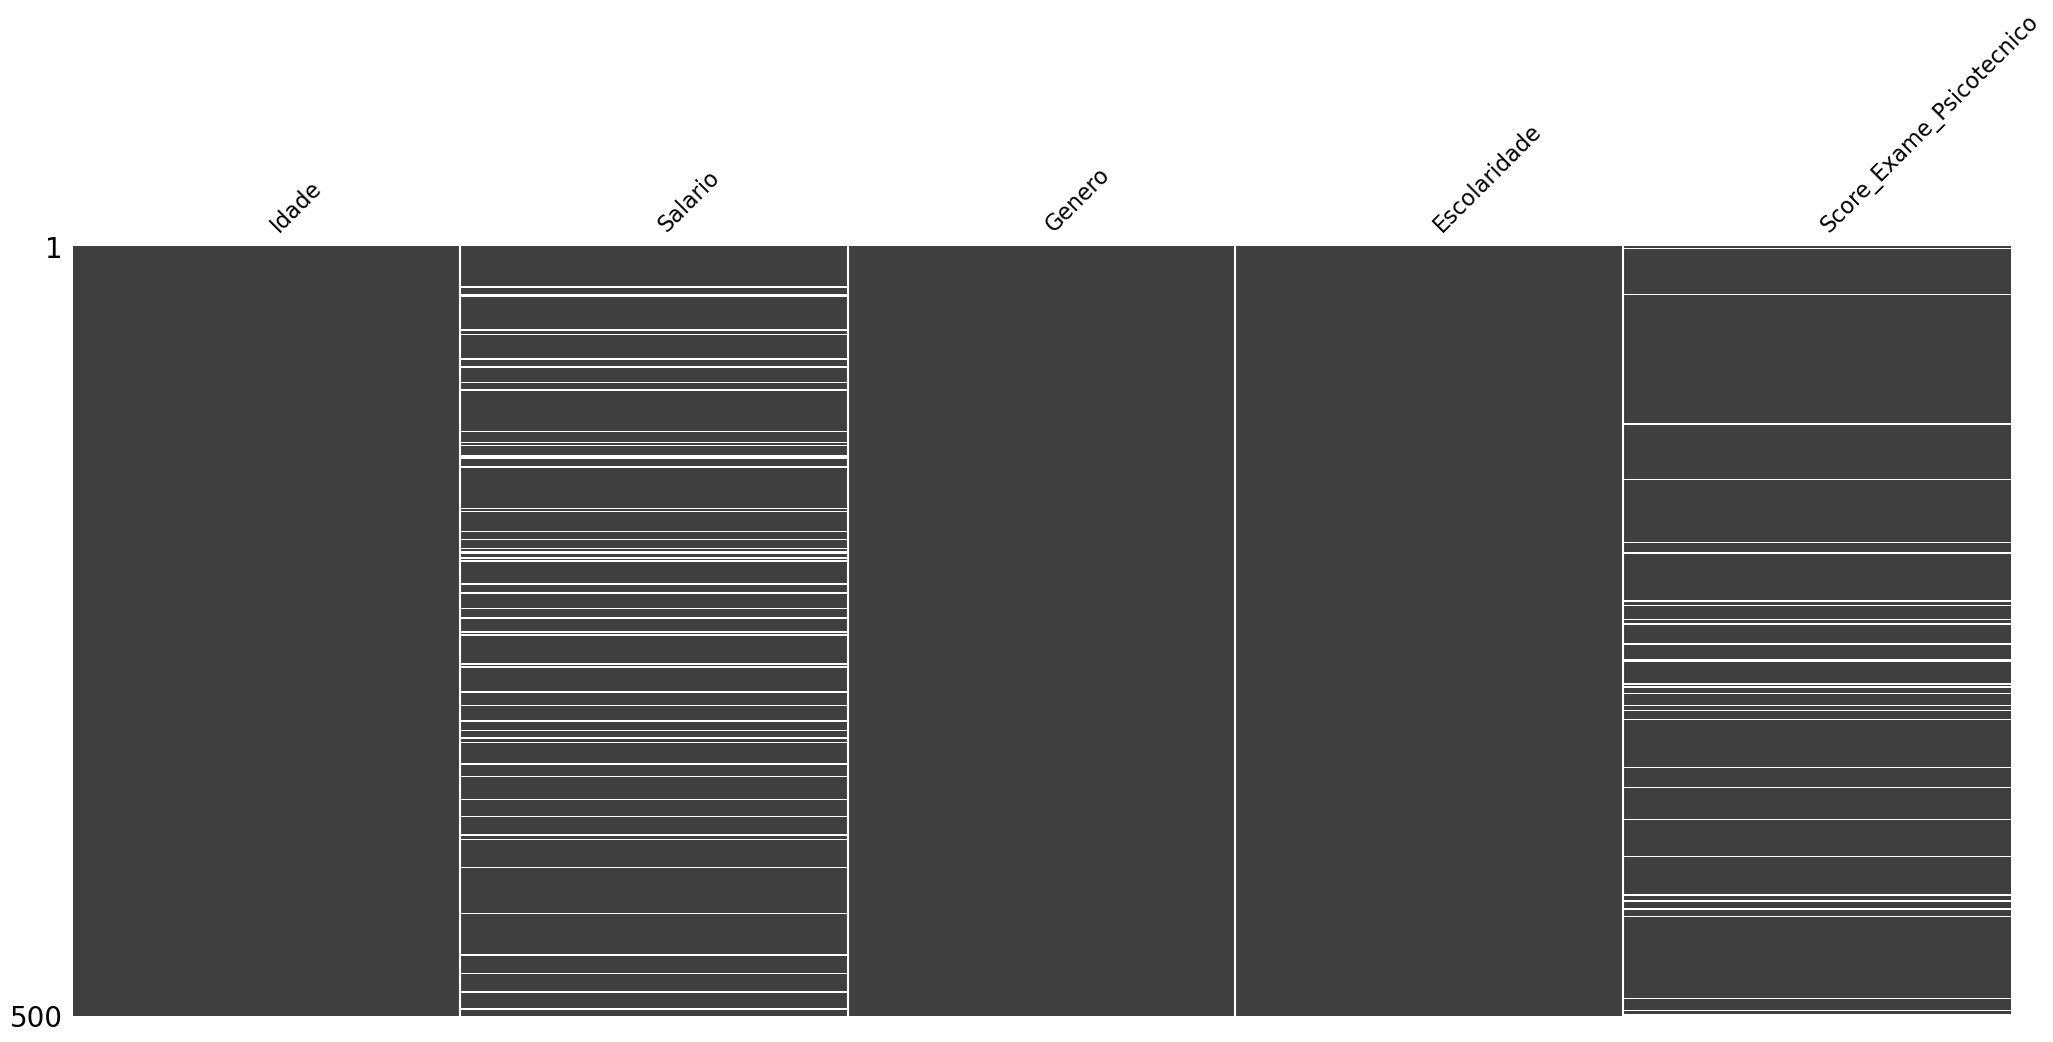

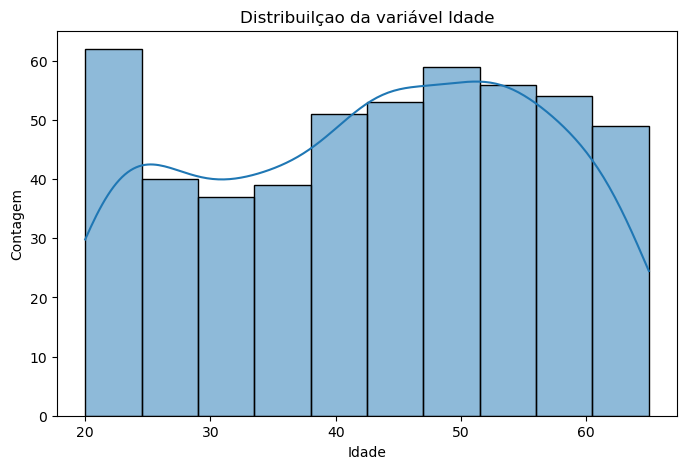

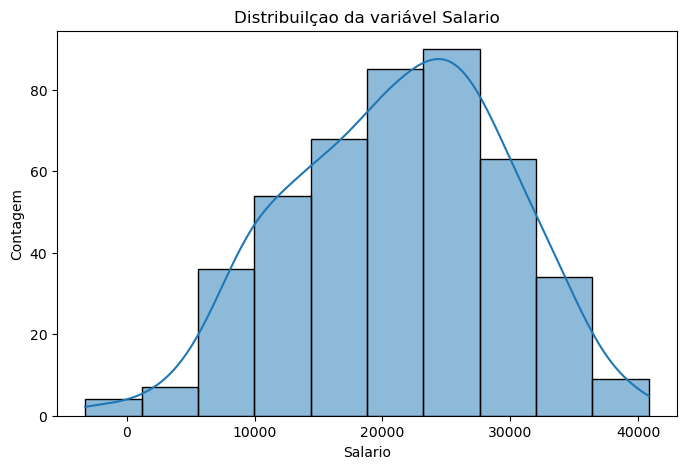

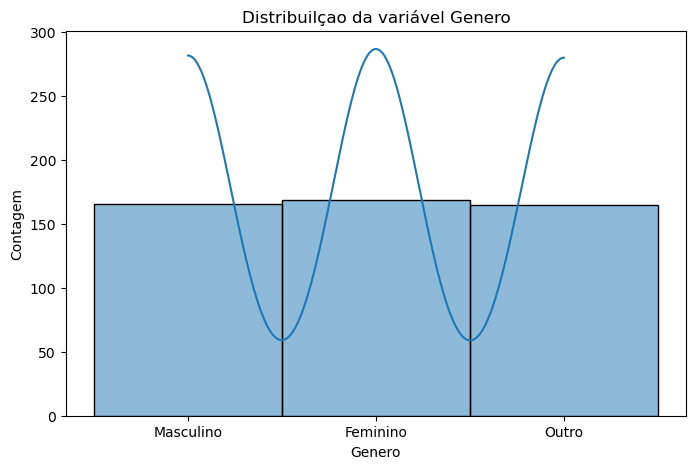

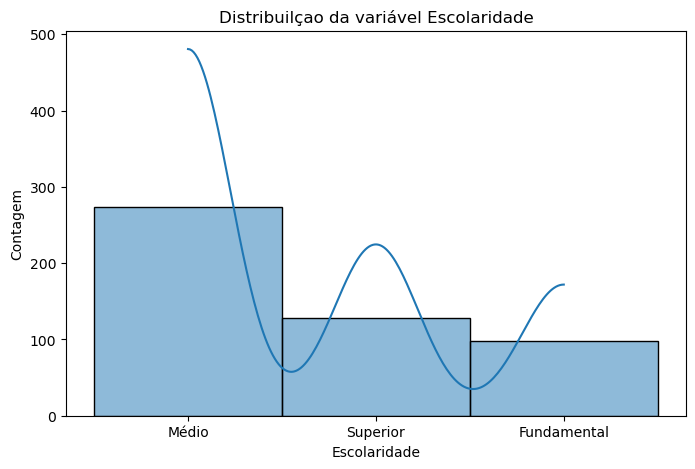

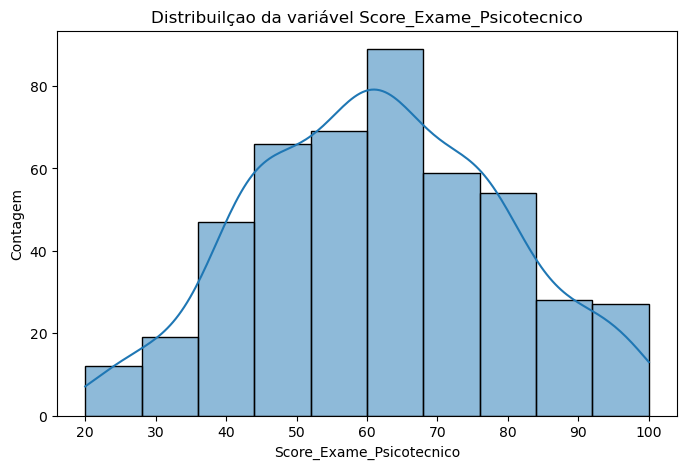

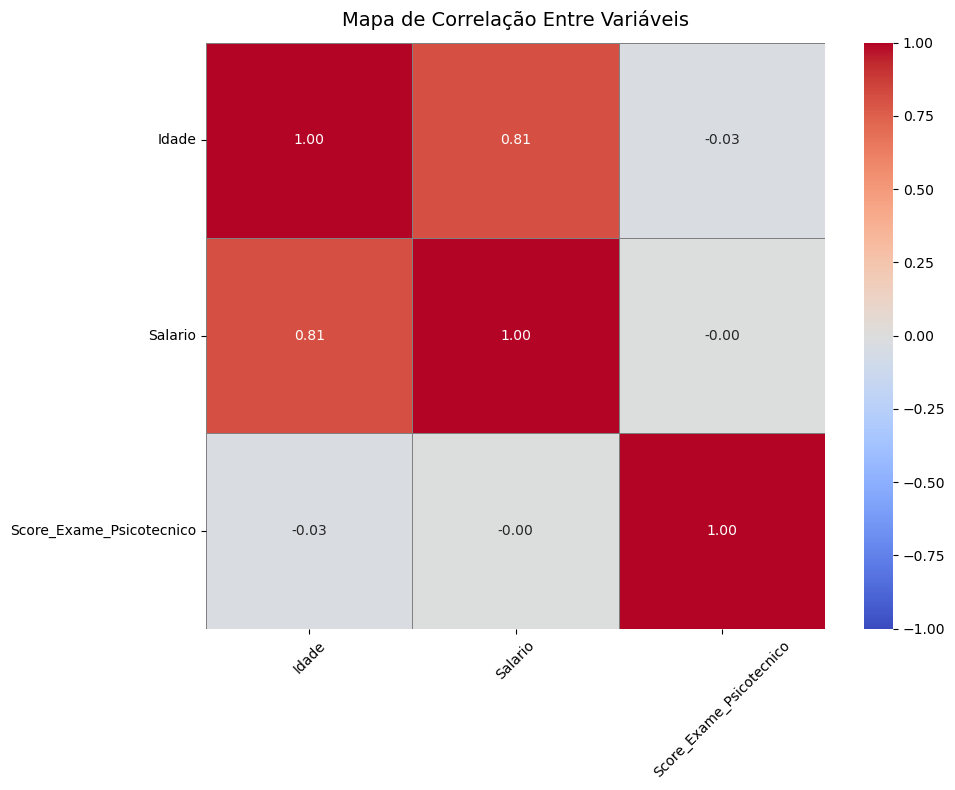

In [76]:
analise_exploratoria(df)

Problemas identificados após a análise exploratória.

    - Valores ausentes nas colunas Salario e Score_Exame_Psicotecnico .
    
    - Possui linhas com salário negativo

insights:

    - Há uma forte correlação positiva entra idade e salário para este conjunto de dados (Quanto maior a idade maior o salário) 


# Tratamento e enriquecimento dos dados

In [77]:
# Aplicando encoding na variável Genero

df['Genero_int'] = df['Genero'].apply(lambda x: 0 if x == 'Masculino' else 1 if x == 'Feminino' else 2)

In [78]:
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Genero_int
0,58,30404.959339,Masculino,Médio,56.0,0
1,48,20886.502401,Feminino,Médio,NaN,1
2,34,15959.388748,Masculino,Médio,57.0,0
3,62,28534.995327,Outro,Superior,68.0,2
4,27,10553.176215,Outro,Fundamental,44.0,2


In [79]:
# Aplicando encoding na variável Escolaridade
df['Escolaridade_int'] = df['Escolaridade'].apply(lambda x: 0 if x == 'Fundamental' else 1 if x == 'Médio' else 2)

In [80]:
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Genero_int,Escolaridade_int
0,58,30404.959339,Masculino,Médio,56.0,0,1
1,48,20886.502401,Feminino,Médio,NaN,1,1
2,34,15959.388748,Masculino,Médio,57.0,0,1
3,62,28534.995327,Outro,Superior,68.0,2,2
4,27,10553.176215,Outro,Fundamental,44.0,2,0


### Tratamento de salários menor que 0

In [82]:
# Verificando as linhas que possuem salário menor que 0
df.query('Salario < 0')

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Genero_int,Escolaridade_int
94,20,-619.478622,Masculino,Médio,58.0,0,1
358,21,-2984.433215,Masculino,Médio,43.0,0,1
380,20,-3254.849042,Outro,Médio,50.0,2,1


In [83]:
# Aplicando na para esses salários para posteriormente aplicarmos a média

df['Salario'] =  df['Salario'].apply(lambda x: None if x < 0 else x)

In [85]:
# Validando se deu certo
df.query('Salario < 0')

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Genero_int,Escolaridade_int


### Tratamento valores ausentes



- Se a assimetria estiver entre -0,5 e 0,5, os dados são bastante simétricos
- Se a assimetria estiver entre -1 e - 0,5 ou entre 0,5 e 1, os dados estão moderadamente inclinados
- Se a assimetria for menor que -1 ou maior que 1, os dados estão altamente enviesados

Vamos aplicar a média caso os dados sejam bastante simétricos, caso contrário aplicaremos a moda

In [86]:
# Função para reutilizar em todas as variáveis com valores ausentes
def verifica_assimetria(col):
    var = df[col].skew(skipna=True)

    if -0.5 <= var <= 0.5:
        print(f'{col} possui dados simétricos (skew = {var:.2f})')
        print('Pode aplicar a média')
    else:
        print(f'{col} possui dados assimétricos (skew = {var:.2f})')
        print('Aplicar a moda')


In [87]:
# Resultado e orientação referente a variável Score_Exame_Psicotecnico
verifica_assimetria('Score_Exame_Psicotecnico')

Score_Exame_Psicotecnico possui dados simétricos (skew = 0.04)
Pode aplicar a média


In [88]:
# Aplicanddo a média para valores ausentes na variável Score_Exame_Psicotecnico
df['Score_Exame_Psicotecnico'] = df['Score_Exame_Psicotecnico'].fillna(np.mean(df.Score_Exame_Psicotecnico))

In [89]:
# Verificando se deu certo
df['Score_Exame_Psicotecnico'].isna().sum()

0

In [90]:
# Resultado e orientação referente a variável Salario
verifica_assimetria('Salario')

Salario possui dados simétricos (skew = -0.11)
Pode aplicar a média


In [91]:
# Aplicanddo a média para valores ausentes na variável Score_Exame_Psicotecnico
df['Salario'] = df['Salario'].fillna(np.mean(df.Salario))

In [92]:
# Verificando se deu certo
df['Salario'].isna().sum()

0

### Aplicando teste do Qui quadrado para verificar se há associação entre as variávceis categoricas

In [93]:
# Criando a tabela de contigência
tabela_contigência = pd.crosstab(df['Genero'], df.Escolaridade)

In [94]:
print(tabela_contigência)

Escolaridade  Fundamental  Médio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


In [95]:
# Iniciando o teste
chi2, p, _, _ = chi2_contingency(tabela_contigência)

In [96]:
print(f"Valor-p do teste Qui-quadrado: {p:.4f}")

Valor-p do teste Qui-quadrado: 0.8300


In [97]:
# Análise do resultado
baseline = 0.05

if p < baseline:
    print("Rejeitamos a hipose nula, há associação entre as duas variáveis")
else:
    print(f"Aceitamos a hipotese nula, não há asssociação entre as duas variáveis visto que o valor p({round(p,2)}) é maior que {baseline}")

Aceitamos a hipotese nula, não há asssociação entre as duas variáveis visto que o valor p(0.83) é maior que 0.05


### Verificando se contém duplicidaddes

In [101]:
# Verificando se contem duplicidades
duplicatas = df.duplicated()

In [102]:
df[duplicatas]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Genero_int,Escolaridade_int


 ### Verificando graficamente se possuimos outlier na coluna salário

Text(0.5, 1.0, 'Box plot - Variável Salário')

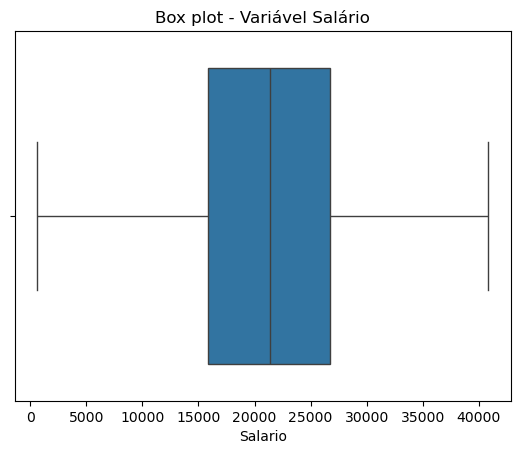

In [104]:
sns.boxplot(data = df, x = 'Salario')
plt.title('Box plot - Variável Salário')

Não contém outlier

### Engenharia de atributos

In [123]:
# Definindo as faixas
faixa_etaria = [0, 25, 35, 45, 55, np.inf]

In [125]:
# definindo os rotulos das faixas
rotulos_faixa = ["Menos que 25", "25-34", "35-44","45-54", "55 ou mais"] 

In [127]:
# Criando a coluna de Faixa_Etaria
df["Faixa_Etaria"] =pd.cut(df['Idade'], bins = faixa_etaria, labels=rotulos_faixa)

In [128]:
df.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Genero_int,Escolaridade_int,Faixa_Etaria
0,58,30404.959339,Masculino,Médio,56.000000,0,1,55 ou mais
1,48,20886.502401,Feminino,Médio,61.565957,1,1,45-54
2,34,15959.388748,Masculino,Médio,57.000000,0,1,25-34
3,62,28534.995327,Outro,Superior,68.000000,2,2,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.000000,2,0,25-34


### Análise estatistica na nova coluna

In [140]:
# Média de salário por faixa Etária
media_salario_faixa = round(df.groupby('Faixa_Etaria')['Salario'].mean(),2)
media_salario_faixa

Faixa_Etaria
Menos que 25    13108.55
25-34           14945.15
35-44           20980.62
45-54           24736.49
55 ou mais      29364.33
Name: Salario, dtype: float64

In [141]:
# Mediana de salário por faixa Etária
mediana_salario_faixa = round(df.groupby('Faixa_Etaria')['Salario'].median(),2)
mediana_salario_faixa

Faixa_Etaria
Menos que 25    12432.95
25-34           15387.78
35-44           21410.76
45-54           24283.12
55 ou mais      29345.33
Name: Salario, dtype: float64

In [142]:
sns.set_style('ticks')

<Axes: xlabel='Faixa_Etaria', ylabel='Salario'>

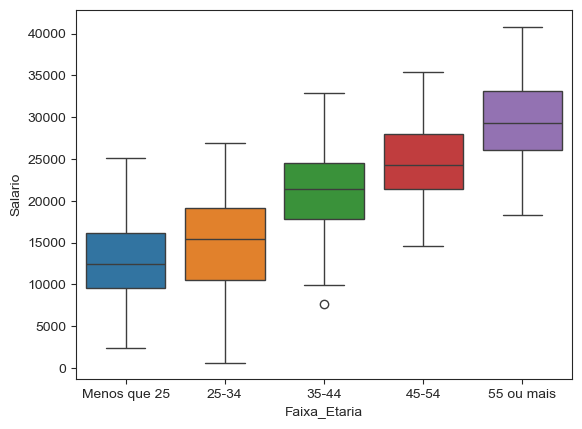

In [143]:
sns.boxplot(data = df, x = 'Faixa_Etaria', y = 'Salario', palette='tab10')

Análise: Na Faixa entre 35-44 anos possui um valor de salário abaixo do padrão

# Trabalho concluído

In [147]:
%watermark -a 'Guilherme'

Author: Guilherme



In [148]:
%watermark --iversion

seaborn   : 0.13.2
numpy     : 1.26.4
missingno : 0.5.2
matplotlib: 3.9.2
watermark : 2.5.0
pandas    : 2.2.2
scipy     : 1.13.1

